<a href="https://colab.research.google.com/github/bulinayas/Deep-deep-learning/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_1_%D0%BE%D1%82_07_%D0%BE%D0%BA%D1%82%D1%8F%D0%B1%D1%80%D1%8F_%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D1%86%D0%B5%D0%BD%D1%8B_%D0%BD%D0%B0_%D0%B2%D0%B8%D0%BD%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задание 1 от 07 октября. Классификация цены на вино**

In [1]:
import numpy as np              
import pandas as pd             
import matplotlib.pyplot as plt 
import seaborn as sns           
import sklearn                  

# Классификация стоимости вина

Набор данных описывает несколько показателей вина. Задача состоит в том, чтобы классифицировать вино по цене, используя приведенные данные.
Класс 1 - цена вина не превышает 316.4 евро
Класс 2 - цена вина более 316.4 евро
Граница 316ю4 евро была взята на основании статистики данных в kaggle.

Набор данных содержит 7500 различных видов красных вин из Испании с 11 характеристиками, которые описывают их цену, рейтинг и даже некоторое описание вкуса. 

# 1. Загружаем данные


К сожалению, по какой-то причине не получилось выгрузить датасет по ссылке. Воспользовалась методом монтирования Google-диска:

In [23]:
# url = "https://github.com/bulinayas/Deep-deep-learning/blob/main/wines_SPA.csv"
# data_raw = pd.read_csv(url)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
data_raw = pd.read_csv("/content/drive/MyDrive/ML/wines_SPA.csv")

In [169]:
data_raw.shape

(7500, 11)

In [170]:
data_raw.head(10)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
5,Vega Sicilia,Unico,1998,4.8,1209,Espana,Ribera del Duero,490.00,Ribera Del Duero Red,5.0,3.0
6,Vega Sicilia,Unico,2010,4.8,1201,Espana,Ribera del Duero,349.00,Ribera Del Duero Red,5.0,3.0
7,Vega Sicilia,Unico,1995,4.8,926,Espana,Ribera del Duero,810.89,Ribera Del Duero Red,5.0,3.0
8,Vega Sicilia,Unico Reserva Especial Edicion,2015,4.8,643,Espana,Ribera del Duero,345.00,Ribera Del Duero Red,5.0,3.0
9,Vega Sicilia,Unico,2011,4.8,630,Espana,Ribera del Duero,315.00,Ribera Del Duero Red,5.0,3.0


Характеристики:

*   `winery`: Название винодельни
*   `wine`: Название вина 
*   `year`: Год, в котором был собран виноград
*   `rating`: Средняя оценка, данная вину пользователями [от 1-5]
*   `num_reviews`: Количество пользователей, которые оценили вино
*   `country`: Страна происхождения [Spain]
*   `region`: Регион производства вина
*   `price`: Цена в евро [€]
*   `type`: Сорт вина
*   `body`: Оценка тела, определяемая как насыщенность и вес вина во рту [от 1 до 5]
*   `acidity`: показатель кислотности, определяемый как “морщинистость” вина или терпкость; это то, что делает вино освежающим, а ваш язык наполняется слюной и хочется сделать еще глоток [от 1 до 5]

Номинальные признаки: `winery`, `wine`, `year`, `country`, `region`, `type`

Количественные признаки: `rating`, `num_reviews`, `price`, `body`(?), `acidity`(?)


Требуется предсказать количественный признак `price` по остальным признакам и отнести вино к одному из двух перечисленных выше классов.

Имена столбцов (признаков) можно получить таким образом:

In [171]:
data_raw.columns

Index(['winery', 'wine', 'year', 'rating', 'num_reviews', 'country', 'region',
       'price', 'type', 'body', 'acidity'],
      dtype='object')

Категориальные значения имеют тип `'Object`'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [172]:
data_raw['winery']

0              Teso La Monja
1                     Artadi
2               Vega Sicilia
3               Vega Sicilia
4               Vega Sicilia
                ...         
7495                 Contino
7496    Conreria d'Scala Dei
7497             Mustiguillo
7498             Matarromera
7499                Sei Solo
Name: winery, Length: 7500, dtype: object

In [173]:
data_raw['winery'] = data_raw['winery'].astype('category')
data_raw['wine'] = data_raw['wine'].astype('category')
data_raw['year'] = data_raw['year'].astype('category')
data_raw['country'] = data_raw['country'].astype('category')
data_raw['region'] = data_raw['region'].astype('category')
data_raw['type'] = data_raw['type'].astype('category')

In [174]:
data_raw['winery'].dtype

CategoricalDtype(categories=['A Coroa', 'AGE', 'Aalto', 'Abadal', 'Abadia Retuerta',
                  'Abel Mendoza Monge', 'Acustic Celler', 'Adama Wines',
                  'Adega Familiar Eladio Pineiro', 'Agusti Torello Mata',
                  ...
                  'Vivaltus', 'Vivanco', 'Vizcarra', 'Volver',
                  'Williams & Humbert', 'Xaloc', 'Ysios', 'Zarate', 'Zifar',
                  'l'Infernal Combier Fischer Gerin'],
, ordered=False)

In [175]:
data_raw['wine'].dtype

CategoricalDtype(categories=['1194', '17', '1730 Amontillado', '1730 Pedro Ximenez',
                  '1902 Centenary Carignan Priorat', '1903 Centenary Grenache',
                  '200 Cestos Godello',
                  '200 Monges Edicion Exclusiva Blanco Reserva',
                  '200 Monges Rioja Gran Reserva', '200 Monges Rioja Reserva',
                  ...
                  'Vinya La Scala Gran Reserva Cabernet Sauvignon',
                  'Vinyes Altes Porrera',
                  'Vinyes Altes de Les Garrigues Vi Blanc',
                  'Vinyes Velles de Samso', 'Vitium Reserva', 'Vitola Reserva',
                  'Vobiscum', 'Voltons',
                  'Whisba Tempranillo Aged 18 Months in Whisky Barrels',
                  'Zona Zepa Monastrell'],
, ordered=False)

In [176]:
data_raw['year'].dtype

CategoricalDtype(categories=['1910', '1922', '1925', '1928', '1929', '1931', '1942',
                  '1946', '1949', '1951', '1953', '1954', '1955', '1958',
                  '1959', '1961', '1962', '1964', '1965', '1967', '1968',
                  '1969', '1970', '1972', '1973', '1974', '1975', '1976',
                  '1978', '1979', '1980', '1981', '1982', '1983', '1985',
                  '1986', '1987', '1988', '1989', '1990', '1991', '1992',
                  '1994', '1995', '1996', '1997', '1998', '1999', '2000',
                  '2001', '2002', '2003', '2004', '2005', '2006', '2007',
                  '2008', '2009', '2010', '2011', '2012', '2013', '2014',
                  '2015', '2016', '2017', '2018', '2019', '2020', '2021',
                  'N.V.'],
, ordered=False)

In [177]:
data_raw['country'].dtype

CategoricalDtype(categories=['Espana'], ordered=False)

In [178]:
data_raw['region'].dtype

CategoricalDtype(categories=['Abona', 'Alella', 'Alicante', 'Almansa', 'Andalucia',
                  'Aragon', 'Arinzano', 'Arribes', 'Bierzo',
                  'Binissalem-Mallorca', 'Cadiz', 'Calatayud',
                  'Campo de Borja', 'Carinena', 'Castilla', 'Castilla y Leon',
                  'Cataluna', 'Cava', 'Cigales', 'Conca de Barbera',
                  'Condado de Huelva', 'Costers del Segre',
                  'Dehesa del Carrizal', 'Dominio de Valdepusa',
                  'El Terrerazo', 'Emporda', 'Extremadura', 'Galicia',
                  'Gran Canaria', 'Jerez Amontillado', 'Jerez Cream',
                  'Jerez Oloroso', 'Jerez Palo Cortado',
                  'Jerez Pedro Ximenes (PX)', 'Jerez-Xeres-Sherry', 'Jumilla',
                  'La Mancha', 'La Palma', 'Madrid', 'Malaga', 'Mallorca',
                  'Manzanilla', 'Mentrida', 'Monterrei', 'Montilla-Moriles',
                  'Montsant', 'Murcia', 'Navarra', 'Otazu', 'Pago Calzadilla',
           

In [179]:
data_raw['type'].dtype

CategoricalDtype(categories=['Albarino', 'Cabernet Sauvignon', 'Cava', 'Chardonnay',
                  'Grenache', 'Mencia', 'Monastrell', 'Montsant Red',
                  'Pedro Ximenez', 'Priorat Red', 'Red',
                  'Ribera Del Duero Red', 'Rioja Red', 'Rioja White',
                  'Sauvignon Blanc', 'Sherry', 'Sparkling', 'Syrah',
                  'Tempranillo', 'Toro Red', 'Verdejo'],
, ordered=False)

In [180]:
data_raw.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [181]:
data_raw.describe(include=['category'])

,winery,wine,year,country,region,type
count,7500,7500,7498,7500,7500,6955
unique,480,847,71,1,76,21
top,Contino,Reserva,2011,Espana,Rioja,Rioja Red
freq,457,467,1190,7500,2440,2357


Удаляем строки с пропущенными значениями:

In [182]:
data_raw.shape

(7500, 11)

In [183]:
data_raw = data_raw.dropna()

In [184]:
NV_drop = data_raw[
    (data_raw['year'] == "N.V.")
    ].index
data_raw = data_raw.drop(NV_drop)
data_raw.shape

(6070, 11)

In [185]:
data_raw['year']

0       2013
1       2018
2       2009
3       1999
4       1996
        ... 
7495    2016
7496    2018
7497    2017
7498    2011
7499    2016
Name: year, Length: 6070, dtype: category
Categories (71, object): ['1910', '1922', '1925', '1928', ..., '2019', '2020', '2021', 'N.V.']

Посмотрим на вантили для соответствующих уровней (в долях единицы).

Квантиль уровня 0.5 (50%) - медиана.

In [186]:
data_raw['price'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005      13.580
0.010      13.580
0.050      16.760
0.100      16.780
0.500      31.630
0.900      82.770
0.950     180.825
0.990     940.000
0.995    1273.100
Name: price, dtype: float64

Мы видим, что $99\%$ всех значений признака `'price'` находится в диапазоне от $13.58$ до $1273.1$ €

Удалим все строки таблицы, в которых `'price'` выходит за пределы квантилей $0.005$, $0.995$ (очень вероятно, что общие тенденции не работают для вин огромной цены (> 2000 €)).

In [187]:
rows_to_drop = data_raw[
    (data_raw['price'] < data_raw['price'].quantile(0.005)) | (data_raw['price'] > data_raw['price'].quantile(0.995))
    ].index
data = data_raw.drop(rows_to_drop)
data.shape

(6010, 11)

In [188]:
data.describe()

,rating,num_reviews,price,body,acidity
count,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000
mean,4.257903,441.020133,59.190116,4.162895,2.946922
std,0.122131,603.436012,110.244390,0.591942,0.243425
min,4.200000,25.000000,13.580000,2.000000,1.000000
25%,4.200000,389.000000,20.900000,4.000000,3.000000
50%,4.200000,402.000000,31.630000,4.000000,3.000000
75%,4.200000,417.000000,61.940000,5.000000,3.000000
max,4.900000,16505.000000,1260.000000,5.000000,3.000000


In [189]:
data.describe(include=['category'])

,winery,wine,year,country,region,type
count,6010,6010,6010,6010,6010,6010
unique,380,658,70,1,62,21
top,Contino,Reserva,2011,Espana,Rioja,Rioja Red
freq,414,421,1076,6010,2217,2140


Видно, что признак country здесь 1 значение. Это фиктивная переменная, не имеет смысла её держать в данных:

In [190]:
data = data.drop(['country'], axis = 1)

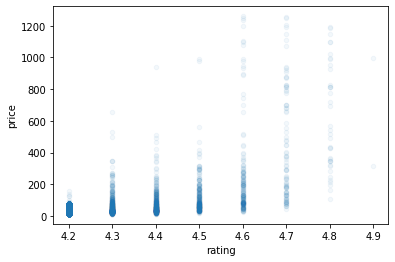

In [191]:
data.plot(kind = 'scatter', x = 'rating', y = 'price', alpha=0.05)
pass # пропустить строчку про matplotlib

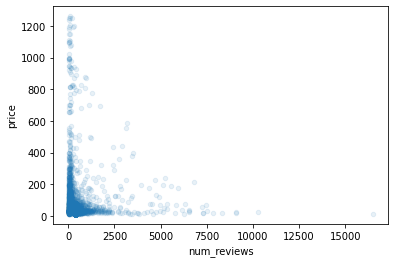

In [192]:
data.plot(kind = 'scatter', x = 'num_reviews', y = 'price', alpha=0.1)
pass # пропустить строчку про matplotlib

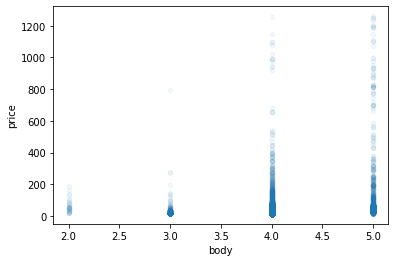

In [193]:
data.plot(kind = 'scatter', x = 'body', y = 'price', alpha=0.05)
pass # пропустить строчку про matplotlib

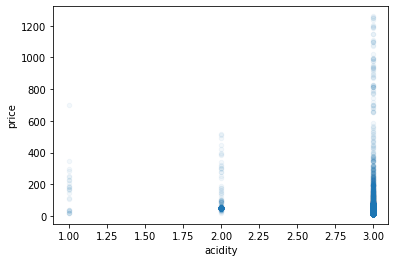

In [194]:
data.plot(kind = 'scatter', x = 'acidity', y = 'price', alpha=0.05)
pass # пропустить строчку про matplotlib

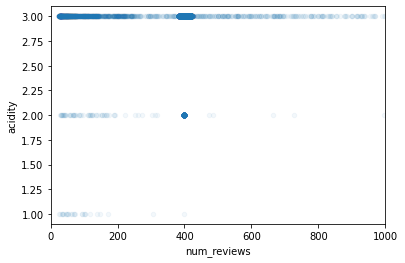

In [195]:
data.plot(kind = 'scatter', x = 'num_reviews', y = 'acidity', alpha=0.05)
plt.xlim([0, 1000])
# plt.ylim([0, 5000])
pass

Вычислим матрицу корреляции для количественных признаков:

In [196]:
corr_mat = data.corr()
corr_mat

,rating,num_reviews,price,body,acidity
rating,1.000000,0.007733,0.610051,0.155179,-0.091403
num_reviews,0.007733,1.000000,-0.031011,0.081887,0.050830
price,0.610051,-0.031011,1.000000,0.171961,-0.063176
body,0.155179,0.081887,0.171961,1.000000,-0.002352
acidity,-0.091403,0.050830,-0.063176,-0.002352,1.000000


Визуальный образ этой матрицы:

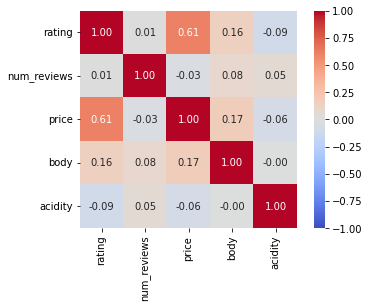

In [197]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Видим, что наблюдается некая корреляция между ценой и рейтингом вина.

## 2. Бинаризация номинальных признаков

Закодируем категориальные признаки с помощью числовых принаков методом one-hot encoding:

In [198]:
winery_dummies = pd.get_dummies(data['winery'])
wine_dummies = pd.get_dummies(data['wine'])
year_dummies = pd.get_dummies(data['year'])
region_dummies = pd.get_dummies(data['region'])
type_dummies = pd.get_dummies(data['type'])

In [199]:
data = pd.concat((data, winery_dummies, wine_dummies, year_dummies, region_dummies, type_dummies), axis=1)
data = data.drop(['winery', 'wine', 'year', 'region', 'type','N.V.'], axis=1)

In [200]:
data.head()

,rating,num_reviews,price,body,acidity,A Coroa,AGE,Aalto,Abadal,Abadia Retuerta,...,Ribera Del Duero Red,Rioja Red,Rioja White,Sauvignon Blanc,Sherry,Sparkling,Syrah,Tempranillo,Toro Red,Verdejo
0,4.9,58,995.00,5.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,4.9,31,313.50,4.0,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4.8,1793,324.95,5.0,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,4.8,1705,692.96,5.0,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,4.8,1309,778.06,5.0,3.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [201]:
data.describe()

,rating,num_reviews,price,body,acidity,A Coroa,AGE,Aalto,Abadal,Abadia Retuerta,...,Ribera Del Duero Red,Rioja Red,Rioja White,Sauvignon Blanc,Sherry,Sparkling,Syrah,Tempranillo,Toro Red,Verdejo
count,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.0,6010.000000,6010.000000,6010.000000,6010.000000,...,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000,6010.000000
mean,4.257903,441.020133,59.190116,4.162895,2.946922,0.0,0.000166,0.001664,0.000499,0.003328,...,0.208985,0.356073,0.014143,0.000166,0.000333,0.000832,0.002163,0.044093,0.042762,0.003827
std,0.122131,603.436012,110.244390,0.591942,0.243425,0.0,0.012899,0.040760,0.022338,0.057596,...,0.406618,0.478877,0.118091,0.012899,0.018241,0.028834,0.046462,0.205319,0.202337,0.061749
min,4.200000,25.000000,13.580000,2.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.200000,389.000000,20.900000,4.000000,3.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.200000,402.000000,31.630000,4.000000,3.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.200000,417.000000,61.940000,5.000000,3.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.900000,16505.000000,1260.000000,5.000000,3.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Видим, что после всех преобразований исчезли "представители" винодельни A Coroa. Запустим классификацию без него:

In [217]:
data = data.drop(['A Coroa'], axis=1)

## 3. Масштабирование количественных признаков

Перед применением алгоритмов машинного обучения была предпринята попытка  количественные признаки нормализовать или стандартизировать. Выяснилось, что в связи с малым разбросом данных эти действия сильно портят датасет: "Input contains NaN, infinity or a value too large for dtype('float64')".

In [249]:
# data_norm = (data - data.min(axis = 0))/(data.max(axis = 0) - data.min(axis = 0))

In [250]:
# data_norm.describe()

In [251]:
# data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

In [252]:
# data_stand.describe()

## 4. Отбор признаков 

Для классификации вина по цене будем использовать все входные признаки, кроме `price`.

In [253]:
data.columns

Index(['rating', 'num_reviews', 'price', 'body', 'acidity', 'AGE', 'Aalto',
       'Abadal', 'Abadia Retuerta', 'Abel Mendoza Monge',
       ...
       'Ribera Del Duero Red', 'Rioja Red', 'Rioja White', 'Sauvignon Blanc',
       'Sherry', 'Sparkling', 'Syrah', 'Tempranillo', 'Toro Red', 'Verdejo'],
      dtype='object', length=1498)

In [266]:
X = data.drop(['price'], axis=1)
y = (data['price'] < 316.4).astype(np.float64)

In [256]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

Можно конвертировать таблицы в массивы:

In [222]:
#X = np.array(X)
#y = np.array(y)

# 5. Обучаем модель

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [267]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(4507, 1503)

## Метод $k$ ближайших соседей ($k$NN, $k$ nearest neighbours)

kNN с 7ю ближайшими соседями:

In [268]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=7) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [269]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

### Измеряем метрики качества

**TP** - истинно положительные исходы; 

**TN** - истинно отрицательные исходы; 

**FP** - ложно положительные исходы;

**FN** - ложно отрицательные исходы.

Возьмём три основные метрики.

*Accuracy (точность):*

$$
{\rm Accuracy} = \frac{{\rm TP + TN}}{{\rm TP + TN + FP + FN}}
$$

*Precision (другая точность):*

$$
{\rm Precision} = \frac{{\rm TP}}{{\rm TP + FP}}
$$

*Recall (полнота, чувствительность):*

$$
{\rm Recall} = \frac{{\rm TP}}{{\rm TP + FN}}
$$

Accuracy бесполезна в задачах с неравными классами. Precision и recall не зависят, в отличие от accuracy, от соотношения классов и потому применимы в условиях несбалансированных выборок. У нас как раз такая.

In [263]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

Для этих меток предсказание должно быть приведено к бинарному виду (из вероятности в метки):

In [280]:
y_train_predict = (y_train_predict > 0.5).astype(np.float64)
y_test_predict = (y_test_predict > 0.5).astype(np.float64)

In [281]:
accuracy_train = accuracy_score(y_train, y_train_predict)
accuracy_test  = accuracy_score(y_test,  y_test_predict)

precision_train = precision_score(y_train, y_train_predict)
precision_test  = precision_score(y_test,  y_test_predict)

recall_train = recall_score(y_train, y_train_predict)
recall_test  = recall_score(y_test,  y_test_predict)

In [286]:
kNN7_table = pd.DataFrame(columns=('train', 'test'))
kNN7_table.loc['accuracy', :] = (accuracy_train, accuracy_test)
kNN7_table.loc['precision', :] = (precision_train, precision_test)
kNN7_table.loc['recall', :] = (recall_train, recall_test)
kNN7_table

,train,test
accuracy,0.980031,0.972721
precision,0.980231,0.974017
recall,0.999773,0.998634


kNN с 57ю соседями:

In [287]:
model = KNeighborsRegressor(n_neighbors=57) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=57)

In [288]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [289]:
y_train_predict = (y_train_predict > 0.5).astype(np.float64)
y_test_predict = (y_test_predict > 0.5).astype(np.float64)

In [290]:
accuracy_train = accuracy_score(y_train, y_train_predict)
accuracy_test  = accuracy_score(y_test,  y_test_predict)

precision_train = precision_score(y_train, y_train_predict)
precision_test  = precision_score(y_test,  y_test_predict)

recall_train = recall_score(y_train, y_train_predict)
recall_test  = recall_score(y_test,  y_test_predict)

In [291]:
kNN57_table = pd.DataFrame(columns=('train', 'test'))
kNN57_table.loc['accuracy', :] = (accuracy_train, accuracy_test)
kNN57_table.loc['precision', :] = (precision_train, precision_test)
kNN57_table.loc['recall', :] = (recall_train, recall_test)
kNN57_table

,train,test
accuracy,0.979365,0.974052
precision,0.979365,0.974052
recall,1.0,1.0


kNN c 1м ближайшем соседом:

In [293]:
model = KNeighborsRegressor(n_neighbors=1) # по умолчанию n_neighbors=5
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [294]:
y_train_predict = model.predict(X_train)
y_test_predict  = model.predict(X_test)

In [295]:
y_train_predict = (y_train_predict > 0.5).astype(np.float64)
y_test_predict = (y_test_predict > 0.5).astype(np.float64)

In [296]:
accuracy_train = accuracy_score(y_train, y_train_predict)
accuracy_test  = accuracy_score(y_test,  y_test_predict)

precision_train = precision_score(y_train, y_train_predict)
precision_test  = precision_score(y_test,  y_test_predict)

recall_train = recall_score(y_train, y_train_predict)
recall_test  = recall_score(y_test,  y_test_predict)

In [297]:
kNN1_table = pd.DataFrame(columns=('train', 'test'))
kNN1_table.loc['accuracy', :] = (accuracy_train, accuracy_test)
kNN1_table.loc['precision', :] = (precision_train, precision_test)
kNN1_table.loc['recall', :] = (recall_train, recall_test)
kNN1_table

,train,test
accuracy,1.0,0.958084
precision,1.0,0.976207
recall,1.0,0.980874


# Выводы

Ура, теперь я могу по вкусу вина и отзывам предсказывать, дорогое вино или нет (настоящий сомелье)!

На самом деле метрики показывают подазрительно хорошее качество. Этому есть по крайней мере два объяснения: 


1.   kNN и мой датасет идеально подходят друг другу: небольшая задача решается не слишком сложным и не слишком простым методом;
2.   Я выбрала неудачные метрики для описания задачи;

Однако, ситуации переобучения всё же удалось достичь: на kNN с одним соседом наблюдаются 100%-ые значения метрик на тренировке, когда на тесте они, конечно, меньше.  



